In [1]:
import pandas as pd
import glob # 경로와 이름을 지정해 파일 처리 작업 
import re
from functools import reduce # 2차원 리스트 -> 1차원 리스트

In [3]:
# nltk : 자연어 처리 패키지
from nltk.tokenize import word_tokenize # 단어 토큰화
from nltk.corpus import stopwords # 불용어 정보 제공
from nltk.stem import WordNetLemmatizer # 표제어 추출 

from collections import Counter # 갯수 자동 계산

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS # wordcloud용 불용어

import nltk

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
all_files = glob.glob('data/myCabinetExcelData*.xls')
all_files

['data\\myCabinetExcelData (1).xls',
 'data\\myCabinetExcelData (2).xls',
 'data\\myCabinetExcelData (3).xls',
 'data\\myCabinetExcelData (4).xls',
 'data\\myCabinetExcelData (5).xls',
 'data\\myCabinetExcelData (6).xls',
 'data\\myCabinetExcelData (7).xls',
 'data\\myCabinetExcelData (8).xls',
 'data\\myCabinetExcelData (9).xls',
 'data\\myCabinetExcelData.xls']

In [7]:
all_files_data = [] 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0].head()


,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,AI and the French National Railway,"Suel, P.","KNOWLEDGE TECHNOLOGY, INC.",1994
1,NaN,2,AI Meets Web 2.0: Building the Web of Tomorrow...,"Tenenbaum, J. M.",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2006
2,NaN,3,AI in Business and Management: Intelligent sys...,"Warkentin, M. E.","KNOWLEDGE TECHNOLOGY, INC.",1994
3,NaN,4,AI and Music: From Composition to Expressive P...,"de Mantaras, R. L.; Arcos, J. L.",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2002
4,NaN,5,Companion Cognitive Systems: A Step toward Hum...,"Forbus, K. D.; Hinrichs, T. R.",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2006


In [8]:
all_files_data_concat = pd.concat(all_files_data, axis= 0 , ignore_index=True)
all_files_data_concat.tail()

,Unnamed: 0,번호,제목,저자,출판사,출판일
995,NaN,96,The Pyro Toolkit for AI and Robotics,"Blank, D.; Kumar, D.; Meeden, L.; Yanco, H.",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2006
996,NaN,97,The Low-Cost Evolution of AI in Domestic Floor...,"Kleiner, Alexander",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2018
997,NaN,98,Editorial: AI Education for the World,"Goel, Ashok",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2017
998,NaN,99,Editorial: Expository AI Applications,"Goel, Ashok",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2017
999,NaN,100,AAAI's National and Innovative Applications Co...,"Hedberg, S. R.",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2006


In [9]:
all_files_data_concat.to_csv('data/riss_AI.csv', encoding='utf-8', index=False)

In [11]:
all_title = all_files_data_concat['제목']
all_title[:5]

0                   AI and the French National Railway
1    AI Meets Web 2.0: Building the Web of Tomorrow...
2    AI in Business and Management: Intelligent sys...
3    AI and Music: From Composition to Expressive P...
4    Companion Cognitive Systems: A Step toward Hum...
Name: 제목, dtype: object

In [12]:
stopWords = set(stopwords.words('english')) # 불용어 추출
lemma = WordNetLemmatizer() # 표제어 추출 작업

In [13]:
words = []  

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(word) for word in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)


print(words[:5])

[['ai', 'french', 'national', 'railway'], ['ai', 'meet', 'web', 'building', 'web', 'tomorrow', 'today'], ['ai', 'business', 'management', 'intelligent', 'system', 'legal', 'profession'], ['ai', 'music', 'composition', 'expressive', 'performance'], ['companion', 'cognitive', 'system', 'step', 'toward', 'human', 'level', 'ai']]


In [14]:
words2 = list(reduce(lambda x , y : x+y, words))
print(words2)

['ai', 'french', 'national', 'railway', 'ai', 'meet', 'web', 'building', 'web', 'tomorrow', 'today', 'ai', 'business', 'management', 'intelligent', 'system', 'legal', 'profession', 'ai', 'music', 'composition', 'expressive', 'performance', 'companion', 'cognitive', 'system', 'step', 'toward', 'human', 'level', 'ai', 'using', 'rcs', 'address', 'ai', 'knowledge', 'integration', 'perspective', 'ai', 'research', 'india', 'ai', 'grand', 'challenge', 'education', 'preference', 'handling', 'combinatorial', 'domain', 'ai', 'social', 'choice', 'short', 'biography', 'contributor', 'ai', 'society', 'birthday', 'issue', 'ai', 'hci', 'two', 'field', 'divided', 'common', 'focus', 'ai', 'bridge', 'dream', 'ai', 'accountability', 'newsfinder', 'automating', 'ai', 'news', 'service', 'ai', 'planning', 'based', 'tool', 'scheduling', 'satellite', 'nominal', 'operation', 'user', 'interface', 'goal', 'ai', 'opportunity', 'mccorduck', 'machine', 'think', 'twenty', 'five', 'year', 'revisiting', 'origin', 'ai'

In [15]:
count = Counter(words2)
count

Counter({'ai': 1128,
         'based': 237,
         'system': 88,
         'enabled': 53,
         'driven': 48,
         'application': 45,
         'intelligence': 42,
         'network': 40,
         'using': 39,
         'artificial': 36,
         'learning': 35,
         'analysis': 33,
         'approach': 33,
         'aluminum': 33,
         'detection': 31,
         'research': 29,
         'management': 28,
         'human': 28,
         'data': 28,
         'ti': 28,
         'titanium': 28,
         'prediction': 27,
         'risk': 25,
         'design': 25,
         'model': 24,
         'assisted': 24,
         'powered': 24,
         'disease': 23,
         'technology': 23,
         'x': 22,
         'service': 21,
         'tool': 21,
         'smart': 21,
         'machine': 20,
         'control': 20,
         'g': 20,
         'challenge': 19,
         'new': 19,
         'study': 19,
         'digital': 19,
         'information': 19,
         'case': 18,
      

In [16]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag)) > 1):
        word_count[tag] = counts 
        print("%s : %d" %(tag, counts))

ai : 1128
based : 237
system : 88
enabled : 53
driven : 48
application : 45
intelligence : 42
network : 40
using : 39
artificial : 36
learning : 35
analysis : 33
approach : 33
aluminum : 33
detection : 31
research : 29
management : 28
human : 28
data : 28
ti : 28
titanium : 28
prediction : 27
risk : 25
design : 25
model : 24
assisted : 24
powered : 24
disease : 23
technology : 23
service : 21
tool : 21
smart : 21
machine : 20
control : 20
challenge : 19
new : 19
study : 19
digital : 19
information : 19
case : 18
method : 18
algorithm : 18
development : 17
decision : 17
clinical : 17
toward : 16
towards : 16
software : 16


In [18]:
del word_count['ai']

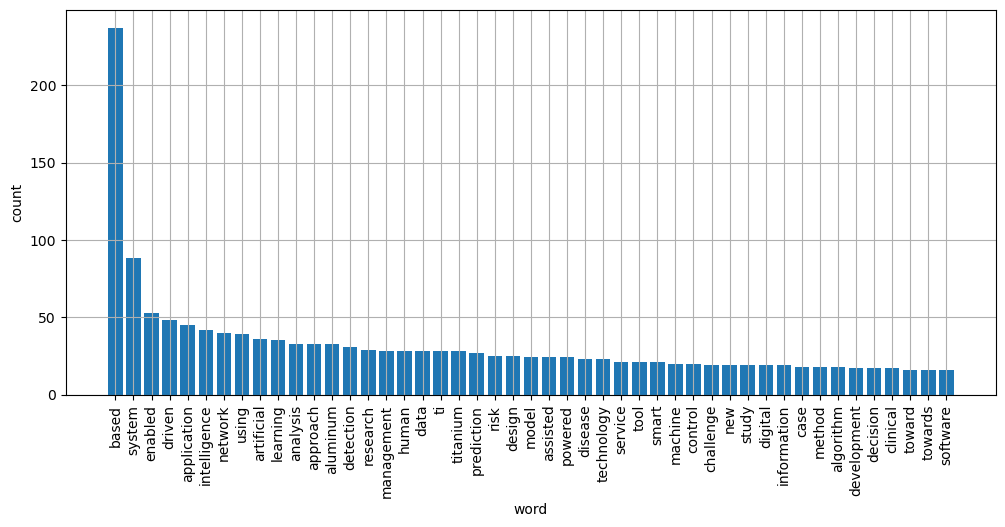

In [19]:
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=90)# x축 눈금

plt.show()

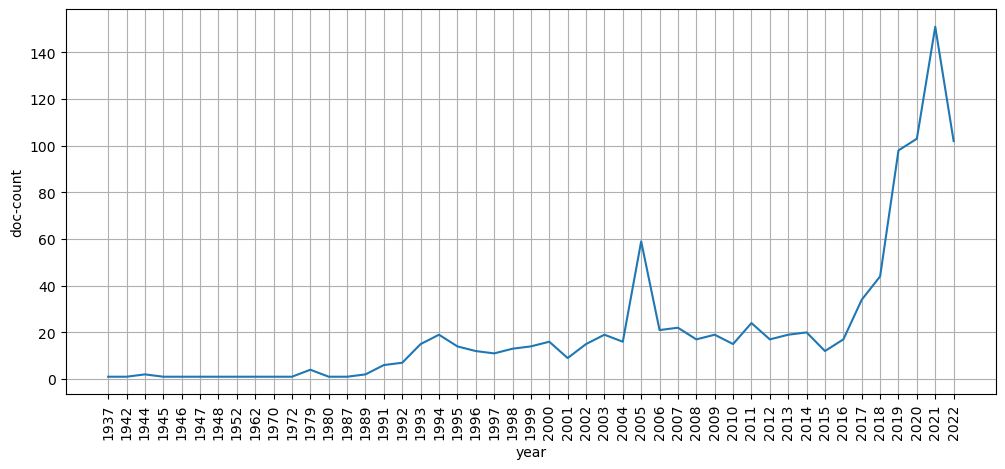

In [20]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year


plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [y for y in summary_year['출판일']], rotation=90)

plt.show()

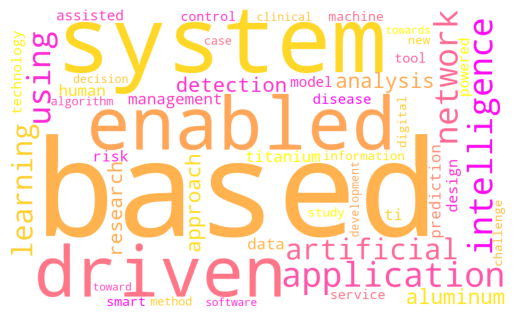

In [21]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='white', colormap='spring', stopwords=stopwords
              , width=1000, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.imshow(cloud)
plt.axis('off')
plt.show()
